In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import random 

np.random.seed(42)

---
#### Linear Regression 
---

In [2]:
## 예제 데이터 생성 
x = list(range(1, 11))
y = [4 * i + 7 for i in x]

print(x, y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


[4.]
6.9999999999999964


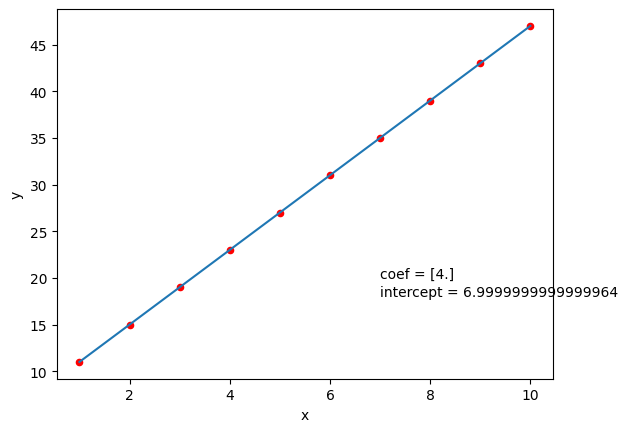

In [3]:
## model & train 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

## x는 2차원 배열이어야 하므로 reshape(-1,1)을 사용, y는 1차원 배열로 처리되므로 추가 변환 불필요
x = np.array(x).reshape(-1,1)  
reg.fit(x,y)

## 훈련결과 파라미터 확인 
print(reg.coef_)
print(reg.intercept_)

## 차트로 확인 
plt.scatter(x,y, color='r', s=20)  # s: size 
plt.plot(x, reg.coef_*x + reg.intercept_)

plt.text(7, 20, f'coef = {reg.coef_}')     # text 함수에 숫자값이 들어가면 오류발생하므로, f' ' 사용
plt.text(7, 18, f'intercept = {reg.intercept_}')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
## 실습 데이터 
df = pd.read_csv('data/국민건강보험공단_건강검진정보_20211229.CSV', encoding='cp949')
pd.set_option('display.max_columns', None)  # None : 최대 컬럼수 제한 없음 
print(df.shape)
df.head()

(1000000, 31)


,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,1.0,1.0,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [5]:
'''
- 건강검진에 중요한 변수 찾기 
- 기준년도(모두 2020년 데이터), 가입자 일련번호, 시도코드, 성별코드, 데이터 공개일자 --> 불필요 
- 임의의 가설 : 시력, 청력, 치아관련은 크게 중요하지 않다. --> 변수제외 
'''
# 불필요한 데이터 삭제
drop_list = ['기준년도', '가입자 일련번호', '시도코드', '성별코드', '데이터 공개일자', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '구강검진 수검여부', '치아우식증유무', '치석']
df.drop(drop_list, axis=1, inplace=True)

# train/test dataset
train = df.dropna(axis=0)
test = df[df['LDL 콜레스테롤'].isnull()]

display(train.head(1))
display(test.head(1))

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0


,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
1,13,150,65,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0


In [6]:
# target data 
y = train['LDL 콜레스테롤']
# train data 
x = train.drop('LDL 콜레스테롤', axis=1)

# train, validation dataset split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(262749, 18) (129415, 18) (262749,) (129415,)


In [7]:
# model training 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)

print(reg.coef_)
print(reg.intercept_)

[ 0.10940698  0.01482723  0.03846911  0.04390587 -0.01075239 -0.00400628
 -0.00250987  0.96960416 -0.17471532 -0.7285143   0.14793707  0.02093034
  0.30343003 -0.01334047  0.01410607 -0.00855896  0.26395722 -0.70237274]
-22.424253230418515


In [8]:
# predict by RMSE 
y_pred = reg.predict(X_test)

from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)  
rmse

8.126575716555271

---
#### Logistic Regression 
---

In [9]:
# 샘플데이터 
x_train = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y_train = [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
x_test = [0,1,2,18,19]
y_test = [0,0,0,1,1]

# x 데이터 reshape 및 전체 데이터 array로 변경
x_train = np.array(x_train).reshape([-1,1])
y_train = np.array(y_train)
x_test = np.array(x_test).reshape([-1,1])
y_test = np.array(y_test)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(15, 1) (15,) (5, 1) (5,)


In [10]:
# model train 
from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression() 

logi_reg.fit(x_train, y_train)

print(logi_reg.coef_, logi_reg.intercept_)

[[1.19388731]] [-11.34176791]


In [11]:
# accuracy score
logi_reg.score(x_test, y_test)

1.0

---
##### Decision Tree 
---

In [12]:
## 실습 데이터 
df = pd.read_csv('data/국민건강보험공단_건강검진정보_20211229.CSV', encoding='cp949')
display(df.head(1))

## 일부 변수만 사용 
sample_df = df[['신장(5Cm단위)', '성별코드', '체중(5Kg 단위)', '음주여부']]
display(sample_df.head(1))

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29


,신장(5Cm단위),성별코드,체중(5Kg 단위),음주여부
0,165,1,60,0.0


In [13]:
#결측치 처리 
display(sample_df.info())

sample = sample_df.dropna()
display(sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   신장(5Cm단위)   1000000 non-null  int64  
 1   성별코드        1000000 non-null  int64  
 2   체중(5Kg 단위)  1000000 non-null  int64  
 3   음주여부        999804 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 30.5 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 999804 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   신장(5Cm단위)   999804 non-null  int64  
 1   성별코드        999804 non-null  int64  
 2   체중(5Kg 단위)  999804 non-null  int64  
 3   음주여부        999804 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.1 MB


None

In [14]:
# one-hot encoding을 위해 변수값들을 문자열로 변경 
sample = sample.astype('str')

y = sample.음주여부
X = sample.drop('음주여부', axis=1)

# train/valid split
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size = 0.2, shuffle = True, random_state=42
                                                      )

print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(799843, 3) (199961, 3) (799843,) (199961,)


In [15]:
# model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, random_state=42) 
dt_model = dt.fit(x_train, y_train)

print('Train Accuracy= ', dt_model.score(x_train, y_train))
print('Valid Accuracy= ', dt_model.score(x_valid, y_valid))

Train Accuracy=  0.6757701198860276
Valid Accuracy=  0.6751466535974515


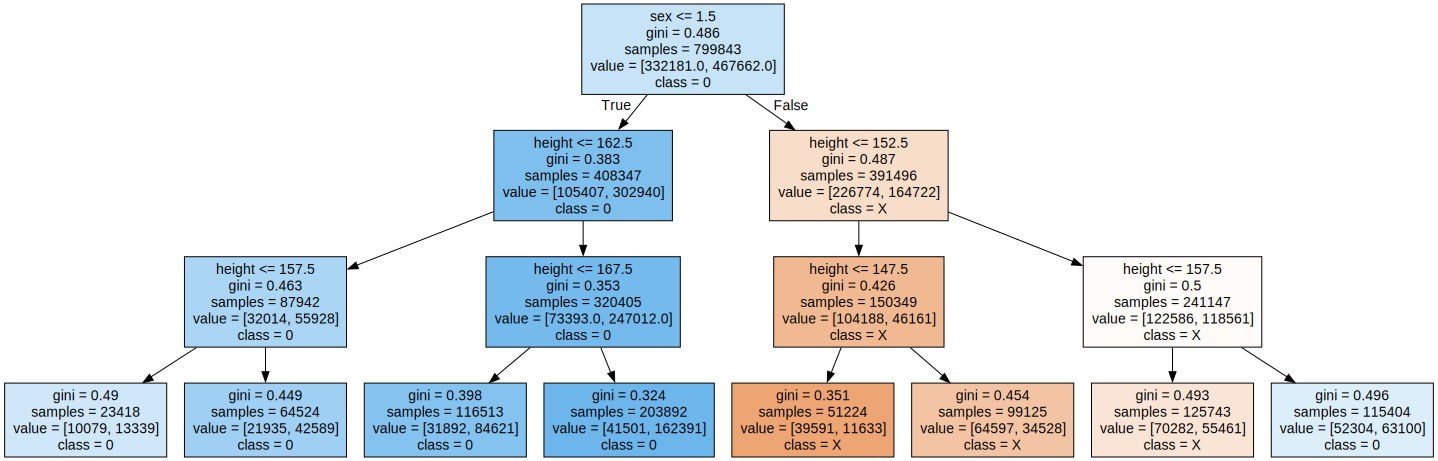

In [16]:
# chart 
#!pip install graphviz
import graphviz 
from sklearn.tree import export_graphviz

tree_graph = graphviz.Source(export_graphviz(dt_model, 
                                             class_names = ['X', '0'], 
                                             feature_names = ['height', 'sex', 'weight'], 
                                             impurity = True, 
                                             filled = True)
                                             )

tree_graph

---
#### Ensemble 
- ensemble 기법에는 voting, bagging, boosting이 있다. 
1) voting : 여러 모델의 결과기반 투표. Hard voting(다수결)과 Soft voting(각 모델의 확률값 평균) 방식이 있다. 
2) bagging : 부트스트랩(원본에서 샘플을 여러번 복원추출) 기반 샘플링 기법으로 생성된 여러 모델의 결과 결합 -> Random Forrest가 대표적 
3) boosting : 여러 모델을 직렬 결합하고, 앞선 모델이 예측한 것중 틀린것에 가중치를 부여, 틀린 데이터를 더 잘맞추도록 훈련 -> Gradient Boosting, XGBoost, LightGBM 등이 대표적 
---

---
#### Random Forrest 
- 다수의 decision tree를 앙상블 하여 overfitting을 방지 
---

In [18]:
# 실습 데이터 (mnist)
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

# MNIST 데이터셋 로드
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()  # 데이터를 텐서로 변환
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# 학습 및 테스트 데이터를 분리
x_train = train_data.data
y_train = train_data.targets
x_test = test_data.data
y_test = test_data.targets

print('원본데이터 형태 =', x_train.shape, y_train.shape, x_test.shape, y_test.shape)

원본데이터 형태 = torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([10000, 28, 28]) torch.Size([10000])


In [ ]:
# 이미지 데이터는 3차원 행렬 -> 2차원으로 변경 필요
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)

print('변경된 데이터 형태 =', X_train.shape, X_test.shape)

변경된 데이터 형태 = torch.Size([60000, 784]) torch.Size([10000, 784])


In [26]:
# modeling 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Decision tree 모델 학습 및 결과 확인 
dct = DecisionTreeClassifier(random_state=42)
dct.fit(X_train, y_train)

acc_train_dct = dct.score(X_train, y_train)
acc_test_dct = dct.score(X_test, y_test)

print('Decision Tree : ', 'train score = ', acc_train_dct, '/', 'test score = ', acc_test_dct)

## Random Forrest 모델 학습 및 결과 확인 
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

acc_train_rfc = rfc.score(X_train, y_train)
acc_test_rfc = rfc.score(X_test, y_test)

print('Random Forrest : ', 'train score = ', acc_train_rfc, '/', 'test score = ', acc_test_rfc)

Decision Tree :  train score =  1.0 / test score =  0.8755
Random Forrest :  train score =  1.0 / test score =  0.9705


[1.0, 0.8755, 1.0, 0.9705]


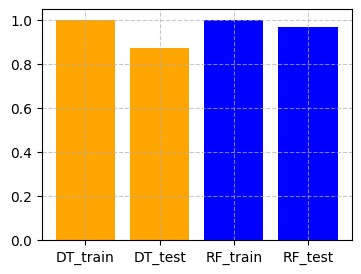

In [36]:
## chart
acc_list_x = ['DT_train', 'DT_test', 'RF_train', 'RF_test']
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc]
colors = ['Orange', 'Orange', 'Blue', 'Blue']
print(acc_list_y)

plt.figure(figsize=(4,3))
plt.bar(acc_list_x, acc_list_y, color=colors)
plt.grid(axis='both', linestyle='--', alpha=0.7)
             
plt.show()

In [37]:
## 참고. Random Forrest의 옵션들 : max_features, n_estimators, n_jobs

max_features = [40, 50, 60]     

for max_feature in max_features:           
    rfc = RandomForestClassifier(max_features=max_feature,  ## 최대 변수 갯수 지정 
                                 n_estimators=100,          ## 트리의 갯수 (기본값 = 100, 생략하면 기본값 적용)
                                 n_jobs=-1,                 ## 사용할 코어 갯수 (-1이면 모든 가용한 코어 사용)
                                 random_state=42)
    
    rfc.fit(X_train, y_train)
    acc_train_dct = rfc.score(X_train, y_train)
    acc_test_dct = rfc.score(X_test, y_test)
    
    print(f"""max_features = {max_feature} : train_acc = {acc_train_dct}, test_acc = {acc_test_dct}""")

40
max_features = 40 : train_acc = 1.0, test_acc = 0.9721
50
max_features = 50 : train_acc = 1.0, test_acc = 0.9719
60
max_features = 60 : train_acc = 1.0, test_acc = 0.9723


---
#### Gradient Boosting 
- Random Forrest가 tree의 병렬연결인데 반해(bagging), GB는 직렬 연결(boosting)   
- 앞선 모델에서 틀린 부분에 가중치를 부여하는 방식 -> 모델 성능 향상에 유리   
- 직렬 연결이므로 순차적 학습 -> 훈련시간이 오래 걸리는 단점 존재   
- 트리 기반 모델이므로, 변수 scaling 불필요 
---

원본데이터 형태 = torch.Size([2000, 28, 28]) torch.Size([2000]) torch.Size([2000, 28, 28]) torch.Size([2000])


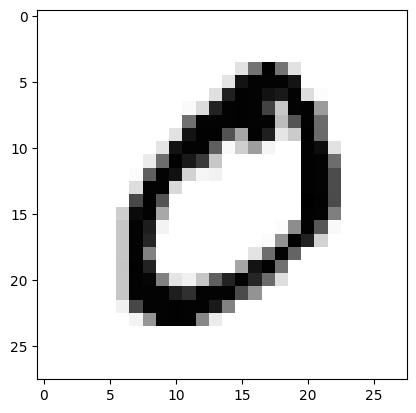

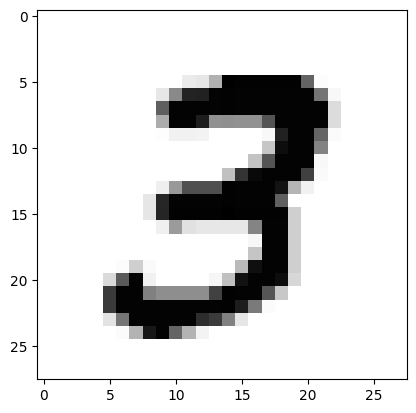

In [39]:
# 실습 데이터 (mnist에서 2000건만 사용)
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

# MNIST 데이터셋 로드
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()  # 데이터를 텐서로 변환
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# 학습 및 테스트 데이터를 분리
x_train = train_data.data[:2000]
y_train = train_data.targets[:2000]
x_test = test_data.data[:2000]
y_test = test_data.targets[:2000]

# 데이터 확인
print('원본데이터 형태 =', x_train.shape, y_train.shape, x_test.shape, y_test.shape)

plt.imshow(x_train[1], cmap='Greys')
plt.show()
plt.imshow(x_train[7], cmap='Greys')
plt.show()

In [40]:
# 이미지는 3차원 데이터 -> 2차원으로 변경 
X_train = x_train.reshape(-1, 28*28)
X_test = x_test.reshape(-1, 28*28)

print('변경된 데이터 형태 =', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

변경된 데이터 형태 = torch.Size([2000, 784]) torch.Size([2000]) torch.Size([2000, 784]) torch.Size([2000])


In [41]:
# modeling 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 1. Decision Tree 
dct = DecisionTreeClassifier(random_state=42)
dct.fit(X_train, y_train)

acc_train_dct = dct.score(X_train, y_train)
acc_test_dct = dct.score(X_test, y_test)

## 2. Random Forrest 
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

acc_train_rfc = rfc.score(X_train, y_train)
acc_test_rfc = rfc.score(X_test, y_test)

## 3. Gradient Boost
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

acc_train_gbc = gbc.score(X_train, y_train)
acc_test_gbc = gbc.score(X_test, y_test)

## 3모델의 성능 비교 
print('1.Decision Tree : ', 'Train score= ', acc_train_dct, 'Test score= ', acc_test_dct)
print('2.Raddom Forrest : ', 'Train score= ', acc_train_rfc, 'Test score= ', acc_test_rfc)
print('3.Gradient Boost : ', 'Train score= ', acc_train_gbc, 'Test score= ', acc_test_gbc)

1.Decision Tree :  Train score=  1.0 Test score=  0.6635
2.Raddom Forrest :  Train score=  1.0 Test score=  0.878
3.Gradient Boost :  Train score=  1.0 Test score=  0.828


In [43]:
## 참고. 위에서 Random Forrest > Gradient Boost > Decision Tree 순으로 우수한 모델임이 나타남 
## Gradient Boost의 성능개선을 위해 옵션 조정해보기 (GB는 다중코어 지원 불가 -> n_jobs = -1 옵션 사용 불가 )
gbc2 = GradientBoostingClassifier(random_state=42, 
                                 n_estimators=200,   ## tree 갯수를 기본 100 -> 200개로                                  
                                 verbose=1           ## 진행률 출력 
                                 )
gbc2.fit(X_train, y_train)

acc_train_gbc2 = gbc2.score(X_train, y_train)
acc_test_gbc2 = gbc2.score(X_test, y_test)

print('4.Gradient Boost 2 : ', 'Train score= ', acc_train_gbc2, 'Test score= ', acc_test_gbc2)

      Iter       Train Loss   Remaining Time 
         1           1.8398            2.24m
         2           1.5879            2.20m
         3           1.4024            2.20m
         4           1.2584            2.18m
         5           1.1338            2.17m
         6           1.0258            2.15m
         7           0.9359            2.14m
         8           0.8556            2.13m
         9           0.7863            2.12m
        10           0.7247            2.11m
        20           0.3653            2.00m
        30           0.2167            1.90m
        40           0.1423            1.81m
        50           0.0982            1.71m
        60           0.0720            1.61m
        70           0.0540            1.49m
        80           0.0410            1.37m
        90           0.0321            1.26m
       100           0.0252            1.14m
       200           0.0024            0.00s
4.Gradient Boost 2 :  Train score=  1.0 Test score=  0